1. Load the Dataset:

In [1]:
import pandas as pd
#1)
df=pd.read_csv('data.csv')
df.head()

,date,station,air_quality_index,temperature,precipitation
0,01-01-2023,ST001,152,19.432104,2.375433
1,02-01-2023,ST001,142,10.501780,9.713951
2,03-01-2023,ST001,64,18.051979,1.809770
3,04-01-2023,ST001,156,15.286200,8.543851
4,05-01-2023,ST001,121,18.187434,4.922779


2. Convert the date column to datatime type.

In [2]:
#2)
df['date'] = pd.to_datetime(df['date'])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 5 columns):
 #   Column             Non-Null Count  Dtype         
---  ------             --------------  -----         
 0   date               730 non-null    datetime64[ns]
 1   station            730 non-null    object        
 2   air_quality_index  730 non-null    int64         
 3   temperature        730 non-null    float64       
 4   precipitation      730 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(1)
memory usage: 28.6+ KB


3. Group by station and calculate monthly avg. temp and total precipitation.

In [3]:
#3)
newdf=df
df['month'] = df['date'].dt.to_period('M').astype(str)

df = df.groupby(['station', 'month']).agg(avg_temp=('temperature', 'mean'),tot_precp=('precipitation', 'sum')).reset_index()
df

,station,month,avg_temp,tot_precp
0,ST001,2023-01,20.211869,150.168450
1,ST001,2023-02,19.369705,142.102736
2,ST001,2023-03,22.961706,156.785700
3,ST001,2023-04,22.003819,160.389577
4,ST001,2023-05,22.044547,145.031142
5,ST001,2023-06,23.683455,146.487063
6,ST001,2023-07,21.831775,154.146256
7,ST001,2023-08,21.195790,135.599407
8,ST001,2023-09,22.768022,159.055543
9,ST001,2023-10,22.262458,184.032491


4. Create a bar plot that shows the total precipitation for both stations across the year.

In [4]:
#4)
st1 = df['tot_precp'][:12]
st2 = df['tot_precp'][12:]
print(st1)
print(st2)

0     150.168450
1     142.102736
2     156.785700
3     160.389577
4     145.031142
5     146.487063
6     154.146256
7     135.599407
8     159.055543
9     184.032491
10    150.948439
11    137.305553
Name: tot_precp, dtype: float64
12    140.165462
13    133.724077
14    143.547910
15    148.890581
16    153.611935
17    137.672945
18    165.826147
19    166.413673
20    138.962635
21    168.619873
22    160.005579
23    160.749782
Name: tot_precp, dtype: float64


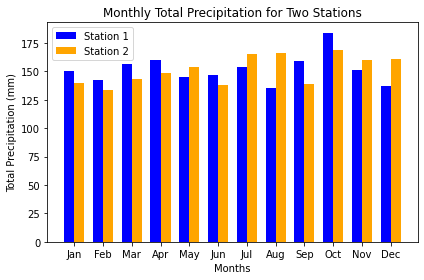

In [5]:
import numpy as np
import matplotlib.pyplot as plt
months = ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']

x = np.arange(len(months))

width = 0.35

plt.bar(x - width/2, st1, width, label='Station 1', color='blue')
plt.bar(x + width/2, st2, width, label='Station 2', color='orange')

plt.xlabel('Months')
plt.ylabel('Total Precipitation (mm)')
plt.title('Monthly Total Precipitation for Two Stations')
plt.xticks(x, months)  
plt.legend() 
plt.tight_layout()
plt.show()

5. Plot a pie chart showing the percentage of days with different AQI categories for one of the stations (e.g., Good, Moderate, Unhealthy based on AQI thresh- olds).

- Good ( AQI < 50) - Moderate (AQI between 51 and 100) Unhealthy ( AQI > 100) 

In [6]:
#5)
df=newdf
g=0
m=0
u=0
for i in df['air_quality_index']:
    if i<=50:
        g+=1
    if i>50 and i<100:
        m+=1
    if i>=100:
        u+=1
print(g,m,u)

#Percentages:
good=str(g/(g+m+u)*100)[:4]
mod=str(m/(g+m+u)*100)[:4]
unh=str(u/(g+m+u)*100)[:4]
print(good,mod,unh)


8 225 497
1.09 30.8 68.0


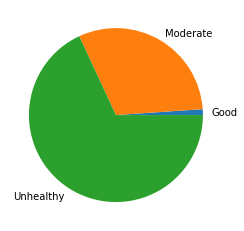

In [7]:
y = np.array([good,mod,unh])

plt.pie(y, labels = ['Good','Moderate','Unhealthy'])
plt.show() 

6. Create a scatter plot comparing the daily temperature and AQI values for one station. Color-code the points based on AQI levels as eo Green: Good - Orange: Moderate - Red: Unhealthy

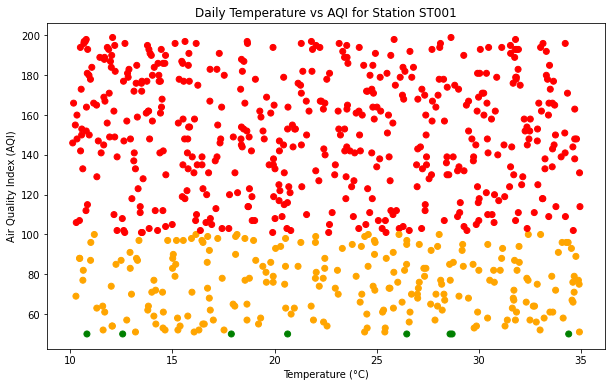

In [8]:
#6)
newdf=df
def aqi_color(aqi):
    if aqi <= 50:
        return 'green'
    elif aqi > 50 and aqi <101:
        return 'orange'
    elif aqi >= 101:
        return 'red'

# Apply the color function to the AQI column to create a color column
df['color'] = df['air_quality_index'].apply(aqi_color)

plt.figure(figsize=(10, 6))
plt.scatter(df['temperature'], df['air_quality_index'],c=df['color'])

plt.xlabel('Temperature (°C)')
plt.ylabel('Air Quality Index (AQI)')
plt.title('Daily Temperature vs AQI for Station ST001')
None

7. Generate a heatmap showing the monthly average AQI levels for both stations.

Use color to represent AQI levels, with a color bar indicating the range.

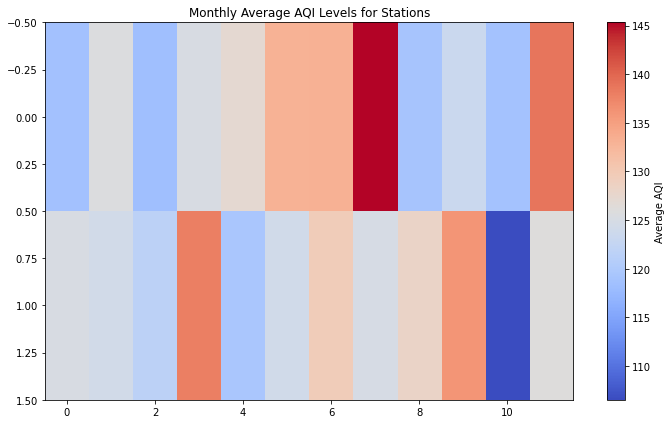

In [9]:
#7)
newddf=df
df['date'] = pd.to_datetime(df['date'])
df['month'] = df['date'].dt.to_period('M').astype(str)

df = df.groupby(['station', 'month']).agg(avg_aqi=('air_quality_index', 'mean')).reset_index()
# Pivot the data 
pivot_df = df.pivot(index='station', columns='month', values='avg_aqi')

plt.figure(figsize=(10, 6))
plt.imshow(pivot_df, cmap='coolwarm', aspect='auto')

plt.colorbar(label='Average AQI')

plt.title('Monthly Average AQI Levels for Stations')

plt.tight_layout()
plt.show()